# NE 630 - Lesson 29

## Kinetics with Feedback

We already have 

$$
\begin{equation}
  \frac{dn}{dt} = \left ( \frac{\rho(t) - \beta}{\Lambda} \right ) n(t) + \lambda C (t)  \, ,
\end{equation}
$$


$$
\begin{equation}
  \frac{d C}{dt} = -\lambda C(t) + \frac{\beta}{\Lambda} n(t)  \, .
\end{equation}
$$

### An Aside on the Homework


(From last time and repeated on the board today): An eigenvalue $\alpha$ satisfies

$$
  \text{det}(\mathbf{A}-\alpha\mathbf{I}) = 0 \longrightarrow \left(\frac{\rho-\beta}{\Lambda}-\alpha\right)\left(-\lambda-\alpha\right)-\frac{\lambda \beta}{\Lambda} = 0 \, .
$$



Rearranging, we have

$$
 \alpha^2  + \overbrace{\lambda \left( 1 - \frac{\rho-\beta}{\lambda \Lambda} \right )}^{\mathcal{B}} \alpha 
 \overbrace{- \left(\frac{\lambda(\rho-\beta)}{\Lambda} + \frac{\lambda\beta}{\Lambda}\right )}^{\mathcal{C}} = 0 \, .
 \tag{1}
$$

The first assumption (i.e., $\frac{1}{\lambda \Lambda} |\beta - \rho| \gg 1$) lets us simplify $\mathcal{B}$ as

$$
 \mathcal{B} = \lambda \left( 1 - \frac{\rho-\beta}{\lambda \Lambda} \right ) 
    \approx \frac{\rho-\beta}{ \Lambda} \, .
$$

Using this approximation in Eq. (1), and multiplying both sides by $\Lambda$, we now seek roots of

$$
 \Lambda \alpha^2  + 
   (\beta-\rho)\alpha - \lambda\rho = 0 \, .
$$

or

$$
  \alpha_{\pm} = \frac{ -(\beta-\rho) \pm (\beta-\rho)\sqrt{1 + 4\rho\frac{\Lambda \lambda}{(\beta-\rho)^2} }}{2\Lambda} \, .
$$

From the first assumption, $x = \Lambda \lambda/|\beta-\rho| \ll 1$.  Then rewrite the radical as

$$
\sqrt{1 + \frac{4\rho}{\beta-\rho} x } \, .
$$


This can be simplified by recalling that

$$
  f(x) \approx f(0) + f'(0)x 
$$

or 

$$
f(x) = \sqrt{1 + a x } \approx \sqrt{1 + 0} + \frac{1}{2}(1+0)^{-1/2} a x = 1 + \frac{ax}{2} \, .
$$

This should get you to $\alpha_{\pm}$ that match the terms in the exponentials of the $n(t)$ given in the problem statement.  With $\alpha_{\pm}$, we can write down

$$
  n(t) = a e^{\alpha_+ t} + b e^{\alpha_- t} \, \qquad \text{and} \qquad C(t) = c e^{\alpha_+ t} + d e^{\alpha_- t} \, .
$$

To get $a$ and $b$, let $n(0) = 1$ (everything will scale according to $n(0)$), so $a + b = n(0) = 1$ or $b = 1-a$.  Similarly, $c + d = C(0) = \beta/(\lambda \Lambda)$.  Then, if we plug $n(t)$ and $C(t)$ into the first kinetics equation and set $t = 0$, you should find (after some rearranging) that

$$
a  \left ( \frac{\rho}{\beta-\rho} - \frac{\rho-\beta}{\lambda \Lambda} \right)   =  \frac{\beta}{ \lambda\Lambda}
$$

Use the first approximation another time, and you'll end up with

$$
  a= \frac{\beta}{\beta-\rho} \, .
$$

And we know that 


$$
\rho(t) = \rho_0 - \alpha T_f(t)
$$

or

$$
  \frac{d\rho}{dT_f} \equiv \alpha_{T_f} \approx \text{-3 pcm/K}
$$


so 

$$
  \frac{d\rho}{dt} = \frac{d\rho}{dT_f} \frac{dT_f}{dt} = \alpha_{T_f} \frac{dT_f}{dt}
$$

Our model:  **assume** that 

$$
 T_f(t) = \kappa \phi(t) + T(0) = \kappa \bar{v} n(t) + T(0)
$$

so

$$
  \frac{d T_f}{dt} = \kappa \bar{v} \frac{dn}{dt} 
$$

In [53]:
sigma_f = 100 # barns
density_UO2 = 10.0 # g/cc
n_U235 = 0.05*(238/(238+32))*density_UO2*6.022e23/235 # a/cc
Sigma_f = sigma_f*1e-24*n_U235 # fission/cm
E_per_fission = 180 # MeV
heat_capacity_UO2 = 300 # J / gK
kappa = Sigma_f * E_per_fission * 1.6e-13 / heat_capacity_UO2 * density_UO2
print(kappa)

1.0842447281323879e-13


In [54]:
def f(y, t, rho00, alpha):
    n, C, T = y[0], y[1], y[2]
    beta = 0.0065
    Lambda = 1e-4 # mean generation time (s)
    lambda_ = np.log(2.0)/5.0  # delayed decay constant (1/s)
    v = 2200*100
    #alpha = 3e-5 # 3 pcm / K

    sigma_f = 100 # barns
    density_UO2 = 10.0 # g/cc
    n_U235 = 0.05*(238/(238+32))*density_UO2*6.022e23/235 # a/cc
    Sigma_f = sigma_f*1e-24*n_U235 # fission/cm
    E_per_fission = 180 # MeV
    heat_capacity_UO2 = 300 # J / gK

    kappa = Sigma_f * E_per_fission * 1.6e-13 / heat_capacity_UO2 * density_UO2

    # set the inserted reactivity with no feedback (i.e., rho at 300)
    rho0 = 0.0
    if 0 < t < 5:
        rho0 = rho00 # <<<< CHANGE ME

    # add the feedback effect
    rho = rho0 - alpha*(T-300)

    dndt = (rho - beta)/Lambda*n + lambda_ * C
    dCdt = beta/Lambda*n  - lambda_ * C
    dTdt = v*kappa*dndt 

    return dndt, dCdt, dTdt

In [55]:
import numpy as np
from scipy.integrate import odeint

times = np.linspace(-5, 10, 1000)

beta_1 = 0.0065
Lambda = 1e-4 # mean generation time (s)
lambda_1 = np.log(2.0)/5.0  # delayed decay constant (1/s)

n0 = 1e9
C0 = beta_1 / Lambda * n0 / lambda_1
T0 = 300.0

y0 = [n0, C0, T0]


In [56]:
import matplotlib.pyplot as plt

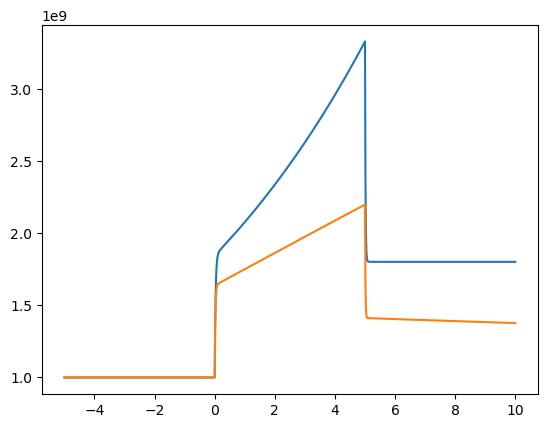

In [62]:
sol1 = odeint(f, y0, times, args=(0.003, 0e-5))
sol2 = odeint(f, y0, times, args=(0.003, 3e-5))

plt.plot(times, sol1[:, 0])
plt.plot(times, sol2[:, 0])